## Bit-Reversal Permutation Matrices

A classical description of $P_{2n}$ can be given by describing its effect on a given vector. If $Z$ is a $2^n$-dimensional vector and $Y = P_{2n} Z$, then $Y_i = Z_j$, for $i = 0, 1, \dots, 2^n - 1$, wherein $j$ is obtained by reversing the bits in the binary representation of index $i$. Therefore, a description of the matrix $P_{2n}$, in terms of its elements $P_{ij}$, for $i$ and $j = 0, 1, \dots, 2^n - 1$, is given as

$$
P_{ij} =
\begin{cases}
1 & \text{if } j \text{ is bit reversal of } i \\
0 & \text{otherwise}
\end{cases}
\quad
$$

A factorization of $P_{2n}$ in terms of $\Pi_{2i}$ is given as

$$
P_{2n} = \Pi_{2n} (I_2 \otimes \Pi_{2n-1}) \cdots (I_2 \otimes \Pi_{2n-i}) \cdots (I_{2n-3} \otimes \Pi_8) (I_{2n-2} \otimes \Pi_4) \quad
$$

![Gamma function](gamma.png "")

$$ {{\rm{\Gamma }}}_{{2}^{n}}|{j}_{n}{j}_{n-1}{j}_{n-2}\cdots {j}_{2}{j}_{1}\rangle =|{j}_{1}{j}_{2}\cdots {j}_{n-2}{j}_{n-1}{j}_{n}\rangle ={({{\rm{\Gamma }}}_{{2}^{n}})}^{-1}|{j}_{n}{j}_{n-1}{j}_{n-2}\cdots {j}_{2}{j}_{1}\rangle $$ 

In [78]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector, random_statevector

def gamma(qc, target_qubits):
    num_qubits = len(target_qubits)
    for i in range(num_qubits // 2):
        qc.swap(target_qubits[i], target_qubits[num_qubits - i - 1])

num_qubits = 8
qc = QuantumCircuit(num_qubits)

# Apply the perfect shuffle permutation
gamma(qc, range(num_qubits))

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()


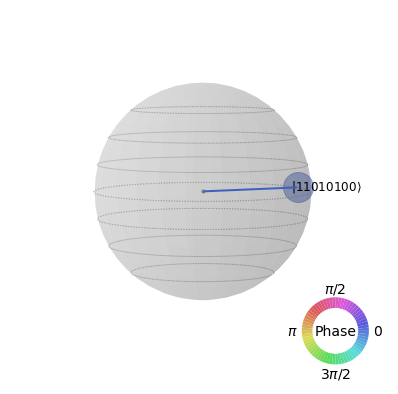

In [79]:
new_sv = statevector.from_label('11010100')
plot_state_qsphere(new_sv)

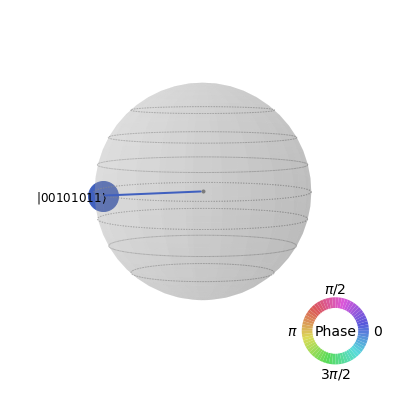

In [80]:
evolved_sv = new_sv.evolve(qc)
plot_state_qsphere(evolved_sv)

In [81]:
print(qc.draw())

                 
q_0: ─X──────────
      │          
q_1: ─┼──X───────
      │  │       
q_2: ─┼──┼──X────
      │  │  │    
q_3: ─┼──┼──┼──X─
      │  │  │  │ 
q_4: ─┼──┼──┼──X─
      │  │  │    
q_5: ─┼──┼──X────
      │  │       
q_6: ─┼──X───────
      │          
q_7: ─X──────────
                 


## Perfect Shuffle Permutation Matrices

A classical description of $\Pi_{2n}$ can be given by describing its effect on a given vector. If $Z$ is a $2n$-dimensional vector, then the vector $Y = \Pi_{2n} Z$ is obtained by splitting $Z$ in half and then shuffling the top and bottom halves of the deck. Alternatively, a description of the matrix $\Pi_{2n}$, in terms of its elements $\Pi_{ij}$, for $i$ and $j = 0, 1, \dots, 2n - 1$, can be given as

$$
\Pi_{ij} =
\begin{cases}
1 & \text{if } j = \frac{i}{2} \text{ and } i \text{ is even, or if } j = \left(\frac{i - 1}{2}\right) + 2^{n-1} \text{ and } i \text{ is odd} \\
0 & \text{otherwise}
\end{cases}
\quad
$$

Quantum description of $\Pi_{2n}$ can be given by

$$
\Pi_{2n} : |a_{n-1}a_{n-2}\ldots a_1a_0\rangle \rightarrow |a_0a_{n-1}a_{n-2}\ldots a_1\rangle \quad
$$

![PSP](shuffle.png "")


In [82]:
def perfect_shuffle(qc, target_qubits):
    num_qubits = len(target_qubits)
    for i in range(num_qubits -1):
        qc.swap(target_qubits[i], target_qubits[i + 1])

In [83]:
qc_shuffle = QuantumCircuit(num_qubits)

# Apply the perfect shuffle permutation
perfect_shuffle(qc_shuffle,range(num_qubits))

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc_shuffle, simulator).result()
statevector = result.get_statevector()

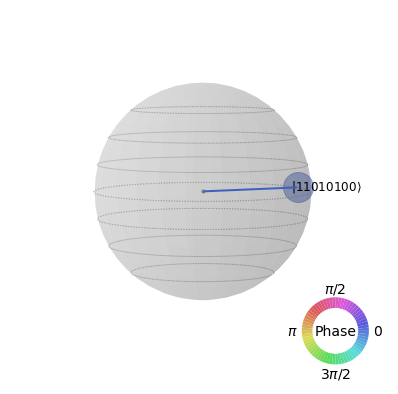

In [84]:
new_sv = statevector.from_label('11010100')
plot_state_qsphere(new_sv)

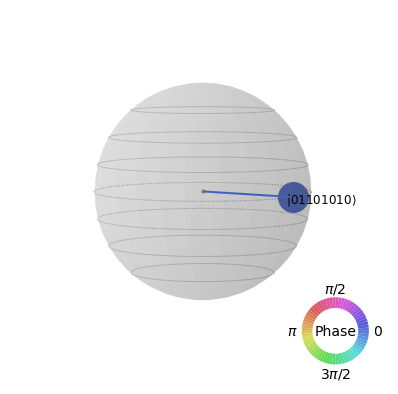

In [85]:
evolved_sv = new_sv.evolve(qc_shuffle)
plot_state_qsphere(evolved_sv)

In [86]:
print(qc_shuffle.draw())

                          
q_0: ─X───────────────────
      │                   
q_1: ─X──X────────────────
         │                
q_2: ────X──X─────────────
            │             
q_3: ───────X──X──────────
               │          
q_4: ──────────X──X───────
                  │       
q_5: ─────────────X──X────
                     │    
q_6: ────────────────X──X─
                        │ 
q_7: ───────────────────X─
                          


## The implementation of Haar quantum wavelet packet transform HQWPT


The (k + 1)-th iteration of HQWPT and its inverse are

$$ \{\begin{array}{rcl}{R}_{{2}^{n}}^{k} & = & {P}_{{2}^{n-1},2}({R}_{{2}^{n-1}}^{k-1}\otimes {I}_{2})\,({I}_{{2}^{n-1}}\otimes H),\\ {({R}_{{2}^{n}}^{k})}^{-1} & = & ({I}_{{2}^{n-1}}\otimes H)\,({({R}_{{2}^{n-1}}^{k-1})}^{-1}\otimes {I}_{2}){P}_{2,{2}^{n-1}}\end{array} $$

with the initial values

$$ \{\begin{array}{rcl}{R}_{{2}^{n-k}}^{0} & = & {P}_{{2}^{n-k-1},2}({I}_{{2}^{n-k-1}}\otimes H),1\le k < n-1,\\ {R}_{2}^{0} & = & H,k=n-1,\\ {({R}_{{2}^{n-k}}^{0})}^{-1} & = & (H\otimes {I}_{{2}^{n-k-1}}){P}_{2,{2}^{n-k-1}},1\le k < n-1,\\ {({R}_{2}^{0})}^{-1} & = & H,k=n-1.\end{array} $$

![HQWPT](hqwt.png "")

In [196]:

def shuffle3(qc, n):
    for i in range(2, n + 1):
        qc.barrier()
        for j in range(n - 1, n - i, -1):
            qc.swap(j, j - 1)

def had(circuit, n):
    for i in range(0,n-1):
        circuit.h(i)

def Haar(circuit, n):
    had(circuit,n)
    shuffle3(circuit,n)

In [197]:
num_qubits = 5
qc_Haar = QuantumCircuit(num_qubits,num_qubits)

Haar(qc_Haar, num_qubits)

qc_Haar.measure(4,4)
qc_Haar.measure(3,3)
qc_Haar.measure(2,2)
qc_Haar.measure(1,1)
qc_Haar.measure(0,0)

print(qc_Haar.draw())

     ┌───┐ ░     ░        ░           ░                ┌─┐
q_0: ┤ H ├─░─────░────────░───────────░───────────X────┤M├
     ├───┤ ░     ░        ░           ░           │ ┌─┐└╥┘
q_1: ┤ H ├─░─────░────────░────────X──░────────X──X─┤M├─╫─
     ├───┤ ░     ░        ░        │  ░        │ ┌─┐└╥┘ ║ 
q_2: ┤ H ├─░─────░─────X──░─────X──X──░─────X──X─┤M├─╫──╫─
     ├───┤ ░     ░     │  ░     │     ░     │ ┌─┐└╥┘ ║  ║ 
q_3: ┤ H ├─░──X──░──X──X──░──X──X─────░──X──X─┤M├─╫──╫──╫─
     └───┘ ░  │  ░  │     ░  │        ░  │ ┌─┐└╥┘ ║  ║  ║ 
q_4: ──────░──X──░──X─────░──X────────░──X─┤M├─╫──╫──╫──╫─
           ░     ░        ░           ░    └╥┘ ║  ║  ║  ║ 
c: 5/═══════════════════════════════════════╩══╩══╩══╩══╩═
                                            4  3  2  1  0 


{'01010': 53, '10000': 62, '11000': 70, '01001': 68, '10010': 63, '10011': 56, '11001': 65, '11010': 80, '10001': 51, '00001': 65, '00000': 68, '00010': 57, '01000': 83, '01011': 62, '00011': 61, '11011': 60}


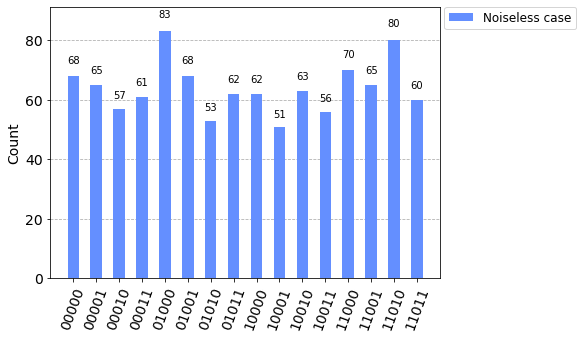

In [198]:
from qiskit import BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc_Haar, backend_sim, shots=1024)
result_sim = job_sim.result()
count = result_sim.get_counts(qc_Haar)
print(count)

legend = ['Noiseless case']
plot_histogram(count, legend=legend)

In [199]:
def shuffle3(qc, n):
    for i in range(2, n + 1):
        qc.barrier()
        for j in range(n - 1, n - i, -1):
            qc.swap(j, j - 1)

num_qubits = 8
qc = QuantumCircuit(num_qubits)
# Apply the perfect shuffle permutation
shuffle3(qc,num_qubits)
#gamma(qc,range(num_qubits))
#perfect_shuffle(qc,range(num_qubits))
# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()

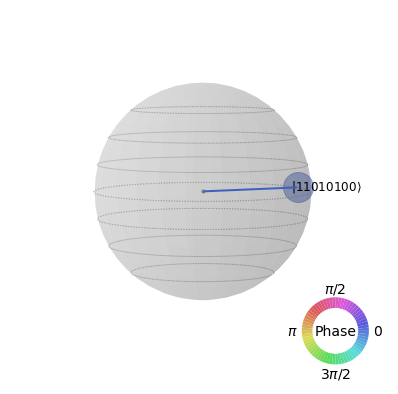

In [200]:
new_sv = statevector.from_label('11010100')
plot_state_qsphere(new_sv)

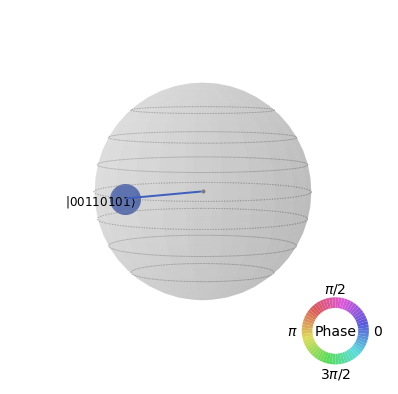

In [201]:
evolved_sv = new_sv.evolve(qc)
plot_state_qsphere(evolved_sv)

In [202]:
print(qc.draw())

      ░     ░        ░           ░              ░                 ░          »
q_0: ─░─────░────────░───────────░──────────────░─────────────────░──────────»
      ░     ░        ░           ░              ░                 ░          »
q_1: ─░─────░────────░───────────░──────────────░─────────────────░──────────»
      ░     ░        ░           ░              ░                 ░          »
q_2: ─░─────░────────░───────────░──────────────░──────────────X──░──────────»
      ░     ░        ░           ░              ░              │  ░          »
q_3: ─░─────░────────░───────────░───────────X──░───────────X──X──░──────────»
      ░     ░        ░           ░           │  ░           │     ░          »
q_4: ─░─────░────────░────────X──░────────X──X──░────────X──X─────░────────X─»
      ░     ░        ░        │  ░        │     ░        │        ░        │ »
q_5: ─░─────░─────X──░─────X──X──░─────X──X─────░─────X──X────────░─────X──X─»
      ░     ░     │  ░     │     ░     │        ░   

In [ ]:
qc_shuffle1 = QuantumCircuit(num_qubits)
def shuffle1(qc, n):
    for i in range(1, n):
        for j in range(i, 0, -1):
            qc.swap(0, j)

shuffle1(qc_shuffle1,num_qubits)
print(qc_shuffle1.draw())

In [185]:


def shuffle3(qc, n):
    for i in range(2, n + 1):
        qc.barrier()
        for j in range(n - 1, n - i, -1):
            qc.swap(j, j - 1)

def had(circuit, n):
    for i in range(0,n):
        circuit.h(i)

def Haar(circuit, n):
    had(circuit,n)
    shuffle3(circuit,n)

In [181]:
num_qubits = 5
qc_Haar = QuantumCircuit(num_qubits,num_qubits)

Haar(qc_Haar, num_qubits)

qc_Haar.measure(4,4)
qc_Haar.measure(3,3)
qc_Haar.measure(2,2)
qc_Haar.measure(1,1)
qc_Haar.measure(0,0)

print(qc_Haar.draw())

     ┌───┐ ░     ░        ░           ░                ┌─┐
q_0: ┤ H ├─░─────░────────░───────────░───────────X────┤M├
     ├───┤ ░     ░        ░           ░           │ ┌─┐└╥┘
q_1: ┤ H ├─░─────░────────░────────X──░────────X──X─┤M├─╫─
     ├───┤ ░     ░        ░        │  ░        │ ┌─┐└╥┘ ║ 
q_2: ┤ H ├─░─────░─────X──░─────X──X──░─────X──X─┤M├─╫──╫─
     ├───┤ ░     ░     │  ░     │     ░     │ ┌─┐└╥┘ ║  ║ 
q_3: ┤ H ├─░──X──░──X──X──░──X──X─────░──X──X─┤M├─╫──╫──╫─
     ├───┤ ░  │  ░  │     ░  │        ░  │ ┌─┐└╥┘ ║  ║  ║ 
q_4: ┤ H ├─░──X──░──X─────░──X────────░──X─┤M├─╫──╫──╫──╫─
     └───┘ ░     ░        ░           ░    └╥┘ ║  ║  ║  ║ 
c: 5/═══════════════════════════════════════╩══╩══╩══╩══╩═
                                            4  3  2  1  0 


In [ ]:
def shuffle2(qc, n):
    for i in range(0, n-1):
        qc.barrier()
        for j in range(0,i+1):
            qc.swap(i-j,i+1-j)